# Bike Sharing Assignment

## Problem Statement: This assignment is a programming assignment to build a multiple linear regression model for the prediction of demand for shared bikes. 

## The steps we will follow for this assignment:
1. Reading and understanding the data.
2. Visualising the data
3. Preparing the data for modeling(train-test)
4. Training the model
5. Residual analysis
6. Predistion and evaluation on the test set

### 1. Reading and understanding the data

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
#read the data
BS_df=pd.read_csv('day.csv')
BS_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [146]:
BS_df.shape

(730, 16)

In [147]:
BS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [148]:
BS_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 2. Visualising the data

In [ ]:
#Visualising continous numeric variable

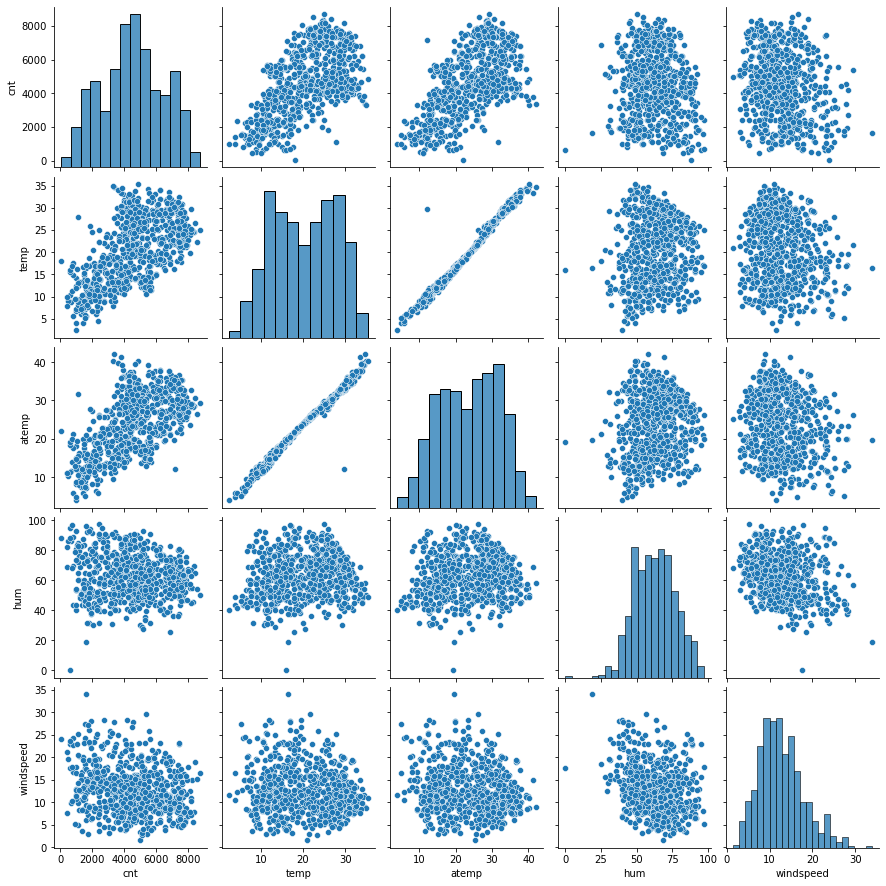

In [150]:
sns.pairplot(BS_df,vars=['cnt', 'temp','atemp','hum','windspeed'])
plt.show()

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

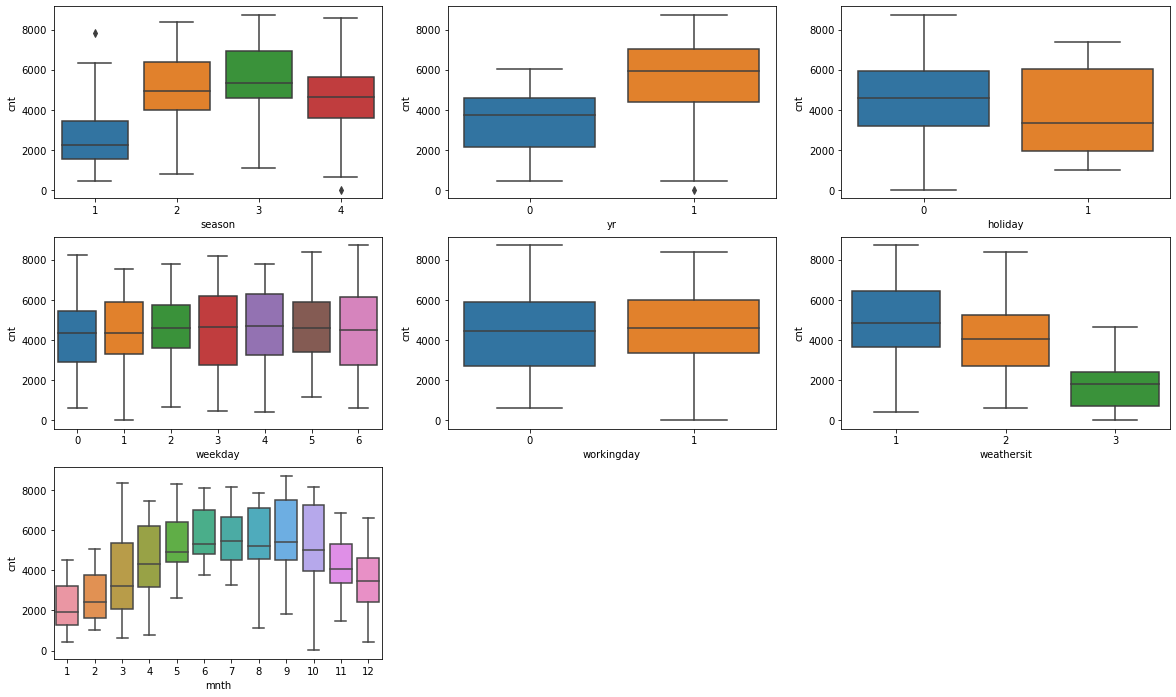

In [151]:
# Visualising categorical variables

plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt',data=BS_df)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt',data=BS_df)
plt.subplot(3,3,3)
sns.boxplot(x='holiday', y='cnt',data=BS_df)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt',data=BS_df)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt',data=BS_df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y='cnt',data=BS_df)
plt.subplot(3,3,7)
sns.boxplot(x='mnth', y='cnt',data=BS_df)


In [152]:
# Drop unnecessary columns
BS_df.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)

In [153]:
BS_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [154]:
# Convert numeric variables back to categorical variables to remove confusion
BS_df['season']=BS_df['season'].map({1:'spring',2:'Summer',3:'Fall',4:'Winter'})

In [155]:
import calendar
BS_df['mnth']=BS_df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [156]:
BS_df['weekday']=BS_df['weekday'].apply(lambda x: calendar.day_abbr[x])

In [157]:
BS_df['weathersit']=BS_df['weathersit'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [158]:
# Assign dummy variables
dummy_df=BS_df[['season','mnth','weekday','weathersit']]
dummy_df=pd.get_dummies(dummy_df, drop_first=True)

In [159]:
dummy_df.head()

,season_Summer,season_Winter,season_spring,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [160]:
# concat two dfs
BS_df=pd.concat([BS_df,dummy_df],axis=1)

In [161]:
BS_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,spring,0,Jan,0,Sun,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,spring,0,Jan,0,Mon,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,1
2,spring,0,Jan,0,Tue,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,Jan,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Thu,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [162]:
# drop the original columns as dummy variable has been created for them
BS_df.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)

In [163]:
BS_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,1,0,0,0,0


### 3. Preparing the data for modeling(train-test)


In [164]:
#Splitting data into Traiing and Test sets
train, test= train_test_split(BS_df, train_size=0.7, random_state=100 )

In [ ]:
# Rescaling the features

In [165]:
# rescale all the numeric variable using MinMaxScaler
numeric_vars=['temp','atemp','hum','windspeed','cnt']
scaler=MinMaxScaler()
train[numeric_vars]= scaler.fit_transform(train[numeric_vars])

In [166]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,1,0,0,0,0,0,1


### 4. Training the model

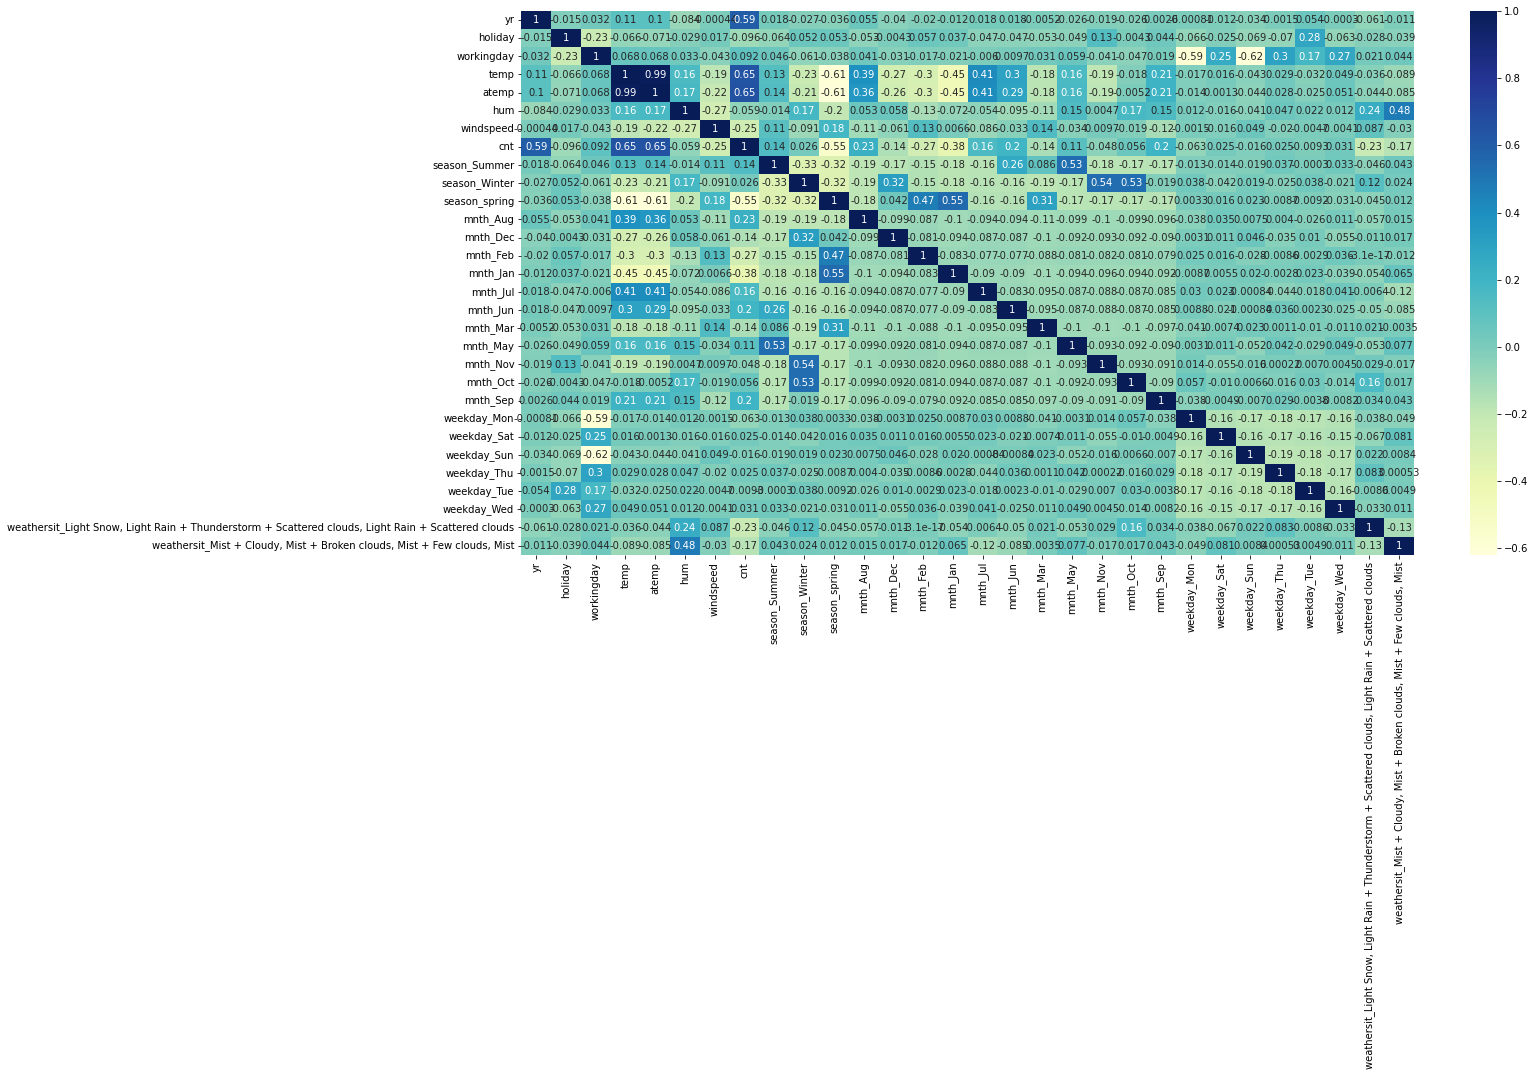

In [167]:
# Plot heat map to see the correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot= True, cmap= 'YlGnBu')
plt.show()

### Model1

In [168]:
# x_train, y_train
y_train=train.pop('cnt')
X_train=train

In [169]:
# add constant
X_train_sm =sm.add_constant(X_train)

In [170]:
lr=sm.OLS(y_train,X_train_sm,).fit()

In [171]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.81e-180
Time:                        22:11:12   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2394      0.035      6.761      0.000       0.170       0.309
yr                                                                                                     0.2325      0.008     28.794      0.000       0.217       0.248
holiday                                                                                                0.0051      0.024      0.210      0.833      -0.042       0.052
workingday                                                                                             0.0904      0.012      7.292      0.000       0.066       0.115
temp                                                                                                   0.3880      0.142      2.727      0.007       0.108       0.668
atemp                                                                                                  0.0590      0.138      0.426      0.670      -0.213       0.331
hum                                                                                                   -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                                                                                             -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_Summer                                                                                          0.0424      0.026      1.617      0.107      -0.009       0.094
season_Winter                                                                                          0.1071      0.028      3.826      0.000       0.052       0.162
season_spring                                                                                         -0.0454      0.030     -1.511      0.131      -0.104       0.014
mnth_Aug                                                                                               0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec                                                                                              -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb                                                                                              -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan                                                                                              -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_Jul                                                                     

In [172]:
# Calculate the VIFs 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.43
3,temp,66.90
4,atemp,56.03
23,weekday_Sun,19.71
21,weekday_Mon,18.34
9,season_spring,10.77
8,season_Winter,9.46
7,season_Summer,8.29
18,mnth_Nov,6.79
10,mnth_Aug,6.47


### Model2

In [173]:
# As there are 30 columns in total lets use RFE for feature selection
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE with the output number of variable = 15
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)


In [174]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('season_spring', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 12),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 10),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  True,
  1)]

In [175]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Summer', 'season_Winter', 'season_spring', 'mnth_Jul',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sun',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [176]:
 X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Sat',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [177]:
# For detailed summary lets build model using stats model

In [178]:
X_train_rfe= X_train[col]
X_train_rfe= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

In [179]:
 lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.11e-191
Time:                        22:11:20   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.1995      0.028      7.200      0.000       0.145       0.254
yr                                                                                                     0.2298      0.008     28.647      0.000       0.214       0.246
holiday                                                                                               -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                                                                                             0.0837      0.010      8.665      0.000       0.065       0.103
temp                                                                                                   0.5277      0.033     15.884      0.000       0.462       0.593
hum                                                                                                   -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                                                                                             -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_Summer                                                                                          0.0537      0.015      3.631      0.000       0.025       0.083
season_Winter                                                                                          0.0992      0.017      5.815      0.000       0.066       0.133
season_spring                                                                                         -0.0555      0.021     -2.698      0.007      -0.096      -0.015
mnth_Jul                                                                                              -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                                                                                               0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Mon                                                                                            0.0406      0.012      3.315      0.001       0.017       0.065
weekday_Sun                                                                                            0.0937      0.012      8.040      0.000       0.071       0.117
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist      

### Model3

In [180]:
#dropping column with high p-value
X_train_rfe1 = X_train_rfe.drop(['holiday'], axis=1)

In [181]:
X_train_rfe1=sm.add_constant(X_train_rfe1)
lm=sm.OLS(y_train,X_train_rfe1).fit()

In [182]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.11e-191
Time:                        22:11:26   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.1811      0.042      4.301      0.000       0.098       0.264
yr                                                                                                     0.2298      0.008     28.647      0.000       0.214       0.246
workingday                                                                                             0.1021      0.025      4.024      0.000       0.052       0.152
temp                                                                                                   0.5277      0.033     15.884      0.000       0.462       0.593
hum                                                                                                   -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                                                                                             -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_Summer                                                                                          0.0537      0.015      3.631      0.000       0.025       0.083
season_Winter                                                                                          0.0992      0.017      5.815      0.000       0.066       0.133
season_spring                                                                                         -0.0555      0.021     -2.698      0.007      -0.096      -0.015
mnth_Jul                                                                                              -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                                                                                               0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Mon                                                                                            0.0591      0.027      2.192      0.029       0.006       0.112
weekday_Sun                                                                                            0.1121      0.027      4.181      0.000       0.059       0.165
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0563      0.010     -5.425      0.000      -0.077      -0.036
=============================================================================

In [183]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.08
2,workingday,9.07
12,weekday_Sun,6.06
11,weekday_Mon,5.74
8,season_spring,5.02
3,temp,3.62
7,season_Winter,3.49
6,season_Summer,2.62
4,hum,1.91
14,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.57


### Model3

In [ ]:


# dropping variable with VIF> 5

X_train_rfe2 = X_train_rfe1.drop(['workingday'], axis=1)

In [186]:
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.89
7,season_spring,5.01
2,temp,3.62
6,season_Winter,3.48
5,season_Summer,2.62
3,hum,1.91
13,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.57
8,mnth_Jul,1.49
9,mnth_Sep,1.29
12,"weathersit_Light Snow, Light Rain + Thundersto...",1.25


In [187]:
X_train_rfe2=sm.add_constant(X_train_rfe2)
lm=sm.OLS(y_train,X_train_rfe2).fit()

In [188]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          4.02e-189
Time:                        22:11:31   Log-Likelihood:                 509.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     496   BIC:                            -931.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2804      0.035      8.096      0.000       0.212       0.348
yr                                                                                                     0.2302      0.008     28.276      0.000       0.214       0.246
temp                                                                                                   0.5292      0.034     15.693      0.000       0.463       0.595
hum                                                                                                   -0.1621      0.038     -4.275      0.000      -0.237      -0.088
windspeed                                                                                             -0.1833      0.026     -7.105      0.000      -0.234      -0.133
season_Summer                                                                                          0.0542      0.015      3.605      0.000       0.025       0.084
season_Winter                                                                                          0.0964      0.017      5.568      0.000       0.062       0.130
season_spring                                                                                         -0.0581      0.021     -2.779      0.006      -0.099      -0.017
mnth_Jul                                                                                              -0.0538      0.018     -2.932      0.004      -0.090      -0.018
mnth_Sep                                                                                               0.0784      0.017      4.687      0.000       0.046       0.111
weekday_Mon                                                                                           -0.0390      0.012     -3.339      0.001      -0.062      -0.016
weekday_Sun                                                                                            0.0139      0.011      1.233      0.218      -0.008       0.036
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2401      0.026     -9.078      0.000      -0.292      -0.188
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0543      0.011     -5.154      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       79.998   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.199
Skew:  

### Model4- Final Model

In [189]:
#dropping column with high p-value
X_train_rfe3 = X_train_rfe2.drop(['weekday_Sun'], axis=1)

In [190]:
X_train_rfe3=sm.add_constant(X_train_rfe3)
lm=sm.OLS(y_train,X_train_rfe3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.9
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          5.65e-190
Time:                        22:11:34   Log-Likelihood:                 508.62
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     497   BIC:                            -936.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2839      0.035      8.224      0.000       0.216       0.352
yr                                                                                                     0.2299      0.008     28.236      0.000       0.214       0.246
temp                                                                                                   0.5287      0.034     15.669      0.000       0.462       0.595
hum                                                                                                   -0.1639      0.038     -4.322      0.000      -0.238      -0.089
windspeed                                                                                             -0.1822      0.026     -7.065      0.000      -0.233      -0.132
season_Summer                                                                                          0.0541      0.015      3.597      0.000       0.025       0.084
season_Winter                                                                                          0.0967      0.017      5.586      0.000       0.063       0.131
season_spring                                                                                         -0.0580      0.021     -2.777      0.006      -0.099      -0.017
mnth_Jul                                                                                              -0.0534      0.018     -2.907      0.004      -0.089      -0.017
mnth_Sep                                                                                               0.0785      0.017      4.689      0.000       0.046       0.111
weekday_Mon                                                                                           -0.0415      0.012     -3.606      0.000      -0.064      -0.019
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2394      0.026     -9.051      0.000      -0.291      -0.187
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0540      0.011     -5.126      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       75.693   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.010
Skew:                          -0.724   Prob(JB):                     4.11e-46
Kurtosis:                       5.782   Cond. No.                         19.5
================

In [191]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
7,season_spring,5.01
2,temp,3.62
6,season_Winter,3.48
5,season_Summer,2.62
3,hum,1.90
12,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.56
8,mnth_Jul,1.49
9,mnth_Sep,1.29
11,"weathersit_Light Snow, Light Rain + Thundersto...",1.25


### 5. Residual analysis

In [192]:
y_train_pred= lm.predict(X_train_rfe3)

Text(0.5, 0, 'Errors')

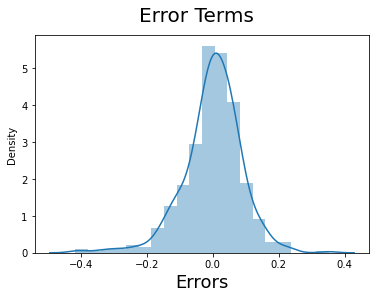

In [193]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

### 6. Prediction and evaluation on the test set

In [195]:
# rescale all the numeric variable using MinMaxScaler
numeric_vars=['temp','atemp','hum','windspeed','cnt']

test[numeric_vars]= scaler.transform(test[numeric_vars])

In [196]:
y_test = test.pop('cnt')
X_test = test

In [198]:
# predicting using values used by the final model
test_col = X_train_rfe3.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 13 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   const                                                                                               220 non-null    float64
 1   yr                                                                                                  220 non-null    int64  
 2   temp                                                                                                220 non-null    float64
 3   hum                                                                                                 220 non-null    float64
 4   windspeed                                                                                           220 non-null  

In [199]:
# Making predictions using the final model

y_pred = lm.predict(X_test)

In [200]:
r2_score(y_test, y_pred)

0.8152708846224653

In [202]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.00883268955582812

In [ ]:
# Model Evaluation

Text(0, 0.5, 'y_pred')

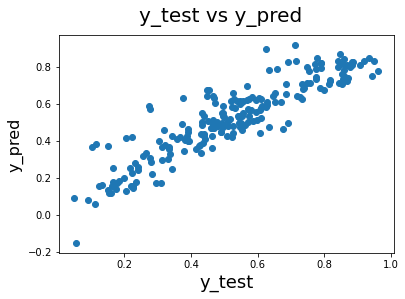

In [204]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [206]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
2,temp,0.528658
0,const,0.283938
1,yr,0.229879
6,season_Winter,0.096705
9,mnth_Sep,0.078501
5,season_Summer,0.054063
10,weekday_Mon,-0.041517
8,mnth_Jul,-0.053393
12,"weathersit_Mist + Cloudy, Mist + Broken clouds...",-0.053991
